In [4]:
import numpy as np
import pandas as pd
cv=pd.read_csv("covid.csv")

In [ ]:
1# visualizzazione delle dimensioni del dataset ed i relativi metadati
#dimensioni= 429434 records e 67 colonne
cv.describe

In [5]:
#2.A
# Il massimo di total_cases per ogni nazione  all'interno di ogni continente(usando max poiché la colonna total cases non è un dato grezzo ma una colonna cumsum )
max_nazione_per_continente = cv.groupby(["continent", "location"])["total_cases"].max()

# Somma i valori massimi di total_cases per ogni continente
somma_max_continente = max_nazione_per_continente.groupby("continent").sum()
print(somma_max_continente)


continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64


In [6]:
#2.B
#Sommo i valori precedenti per continente ed ottengo il valore totale di total cases nel mondo
totale_casi_globali = max_nazione_per_continente.sum()
print(totale_casi_globali)
#essendo i risultati precedenti degli array posso effettuare direttamente operazioni matematica senza iterare manualmente ogni elemento in un ciclo
percentuale_per_continente=(somma_max_continente / totale_casi_globali) * 100
print(percentuale_per_continente)

775900191.0
continent
Africa            1.694231
Asia             38.862260
Europe           32.596572
North America    16.044933
Oceania           1.933670
South America     8.868334
Name: total_cases, dtype: float64


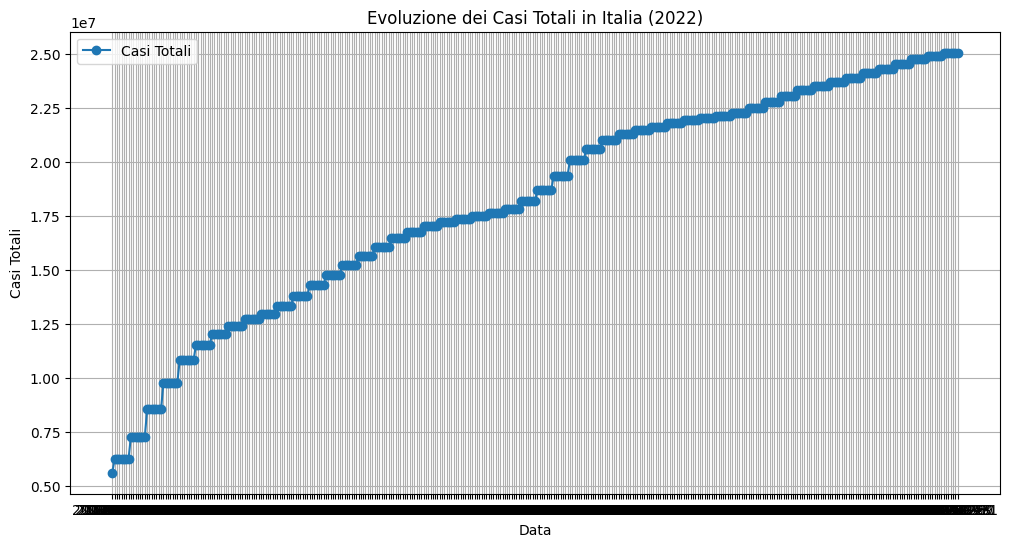

In [57]:
#3.A
#creazione di una variabile al cui interno vengano filtrati tutti i dati ogniqualvolta la colonna "location" corrisponda ad Italy e venga soddisfatta contemporaneamente la condizione della data inserita 
italia_2022 = cv[(cv["location"] == "Italy") & (cv["date"].between("2022-01-01", "2022-12-31"))] 
import matplotlib.pyplot as plt

# Grafico dei casi totali
plt.figure(figsize=(12, 6))
plt.plot(italia_2022["date"], italia_2022["total_cases"], marker="o", label="Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.grid(True)
plt.legend()
plt.show()

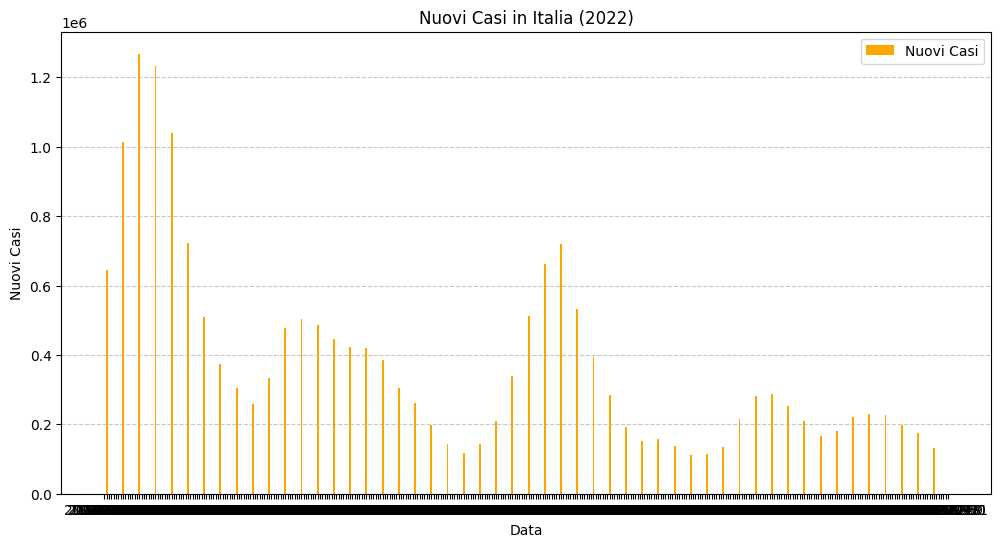

In [58]:
#3.B
# Grafico dei nuovi casi
plt.figure(figsize=(12, 6))
plt.bar(italia_2022["date"], italia_2022["new_cases"], color="orange", label="Nuovi Casi")
plt.title("Nuovi Casi in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

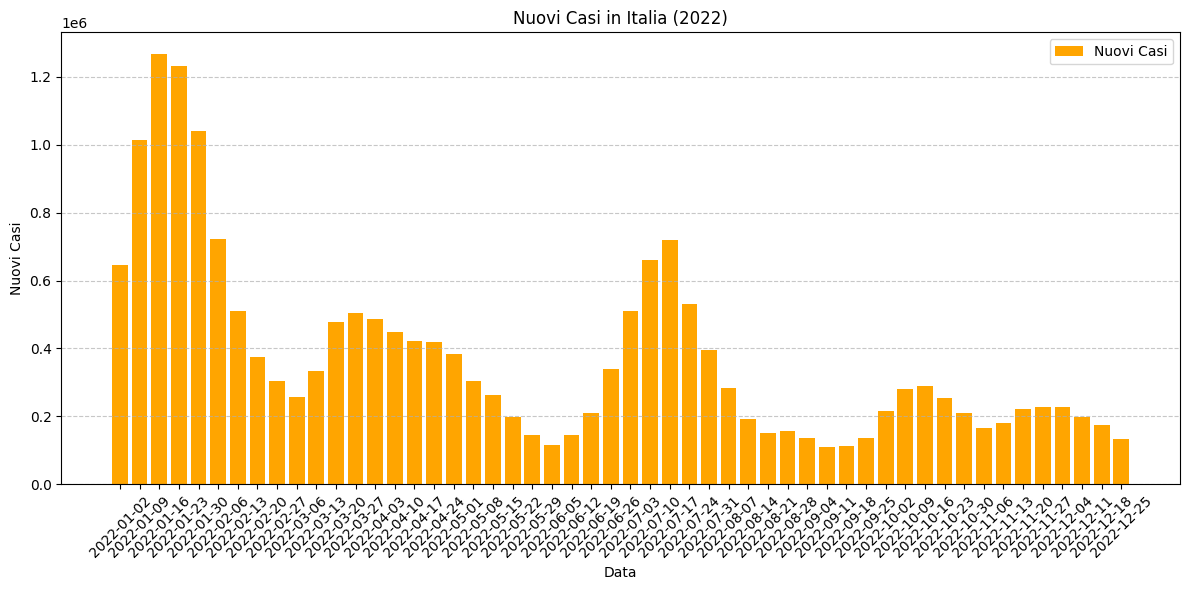

In [ ]:
#3.K
#Grafico del punto 3.B ma filtrando i dati che sono uguali a 0
italia_2022_sett = italia_2022[italia_2022["new_cases"] > 0] 
plt.figure(figsize=(12, 6))
plt.bar(italia_2022_sett["date"], italia_2022_sett["new_cases"], color="orange", label="Nuovi Casi")
plt.title("Nuovi Casi in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Andrea\AppData\Local\Temp\ipykernel_8172\462373360.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dati_filtrati, x="location", y="icu_patients", palette="Set2")


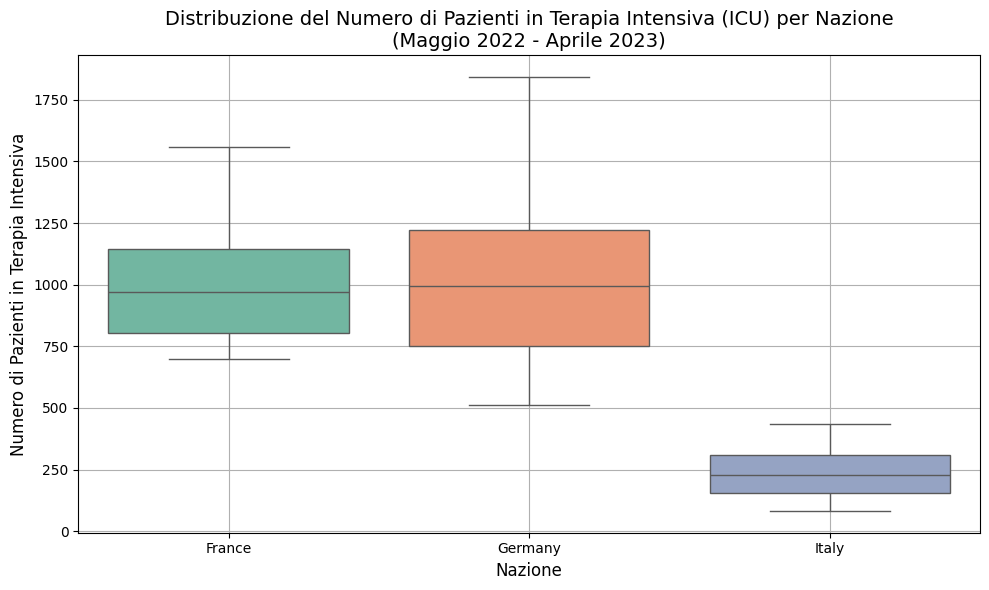

In [ ]:
#4
import seaborn as sns
nazioni_punto4 = ["Italy", "Germany", "France"]
dati_filtrati4 = cv[(cv["location"].isin(nazioni_punto4)) & 
                   (cv["date"] >= "2022-05-01") & 
                   (cv["date"] <= "2023-04-30")]
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dati_filtrati, x="location", y="icu_patients", palette="Set2")
plt.title("Distribuzione del Numero di Pazienti in Terapia Intensiva (ICU) per Nazione\n(Maggio 2022 - Aprile 2023)", fontsize=14)
plt.xlabel("Nazione", fontsize=12)
plt.ylabel("Numero di Pazienti in Terapia Intensiva", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()   # Visualizzazione grafico

In [ ]:
#4.1 COMMENTO GRAFICO
# Da questo grafico potremmo dedurre che l'Italia,avendo una mediana molto più bassa delle altre due nazioni ed i baffi molto stretti , abbiamo avuto meno pressione nel campo delle terapie intensive,
# probabilmente stabilendo protocolli interni di gestione e di prevenzione che hanno minimizzato i possibili casi di trasformazione di casi generici a casi gravi.

In [17]:
#5
nazioni_punto5 = ["Italy", "France", "Germany", "Spain"]
dati_filtrati5 = cv[(cv["location"].isin(nazioni_punto5)) & 
                   (cv["date"] >= "2023-01-01") & 
                   (cv["date"] <= "2023-12-31")]
totale_ospedalizzati = dati_filtrati5.groupby("location")["weekly_hosp_admissions"].sum()
totale_ospedalizzati = totale_ospedalizzati.astype(int)
print(totale_ospedalizzati)



location
France     268117
Germany    897776
Italy      592019
Spain      299463
Name: weekly_hosp_admissions, dtype: int64
